In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([30., 26., 27., 33., 39., 24., 22., 34., 37., 28.]),
 array([0.00704316, 0.10628268, 0.2055222 , 0.30476171, 0.40400123,
        0.50324075, 0.60248027, 0.70171979, 0.8009593 , 0.90019882,
        0.99943834]),
 <a list of 10 Patch objects>)

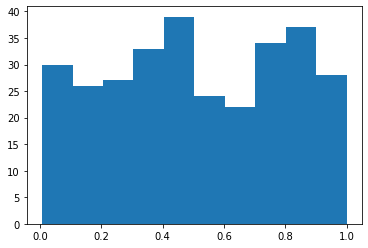

In [3]:
fig,axes = plt.subplots(1,1)

axes.hist(np.random.rand(300))